# ARCH and GARCH models

This notebook explores ARCH and GARCH model.

# Return

$$r_t = \mu + \sigma_t \epsilon_t$$

where $\epsilon_t$ is a white noise with mean 0 and variance 1.

ARCH(1) states that 

$$\sigma_t^2 = \alpha_0 + \alpha_1 a_{t-1}^2,$$
    
where $a_t = \sigma_t \epsilon_t$.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def simulate_arch1(n, alpha0, alpha1, sigma0):
    epsilon = np.random.normal(size=n)
    sigma = np.zeros(n)
    sigma[0] = sigma0
    a = np.zeros(n)
    a[0] = sigma[0] * epsilon[0]
    for i in range(1, n):
        sigma[i] = np.sqrt(alpha0 + alpha1 * a[i-1]**2)
        a[i] = sigma[i] * epsilon[i]
    return sigma, a

In [62]:
def plot_arch1(n, alpha0, alpha1, sigma0):
    sigma, a = simulate_arch1(n, alpha0, alpha1, sigma0)
    plt.plot(sigma)
    
def plot_arch1_return(n, alpha0, alpha1, sigma0, mu):
    sigma, a = simulate_arch1(n, alpha0, alpha1, sigma0)
    r = mu + a
    plt.plot(r)
    
def plot_arch1_accumulated_return(n, alpha0, alpha1, sigma0, mu):
    np.random.seed(42)
    sigma, a = simulate_arch1(n, alpha0, alpha1, sigma0)
    r = mu + a
    plt.plot(np.cumsum(r))
    

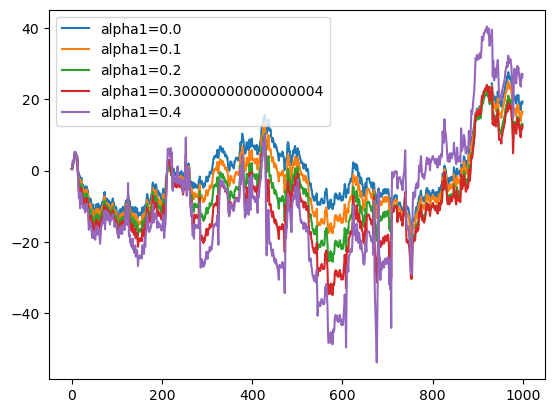

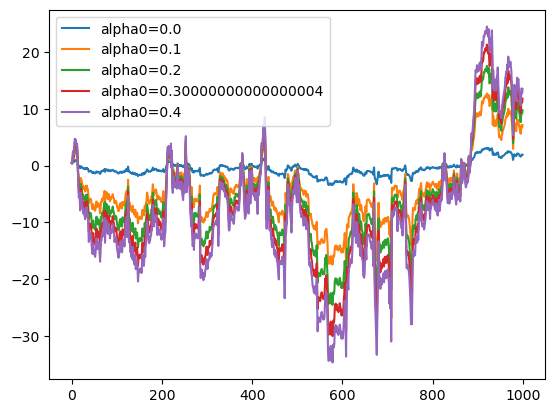

In [66]:
# plot_arch1(1000, 1, 0.1, 1)
# 
# plot_arch1_return(1000, 1, 0.1, 1, 0)
for i in range(5):
    plot_arch1_accumulated_return(1000, 1, 0.3*i, 1, 0)
plt.legend([f'alpha1={0.1*i}' for i in range(5)])
plt.show()


# plot_arch1(1000, 1, 0.1, 1)
# 
# plot_arch1_return(1000, 1, 0.1, 1, 0)
for i in range(5):
    plot_arch1_accumulated_return(1000, 0.2*i + 1e-2, 1, 1, 0)
plt.legend([f'alpha0={0.1*i}' for i in range(5)])
plt.show()

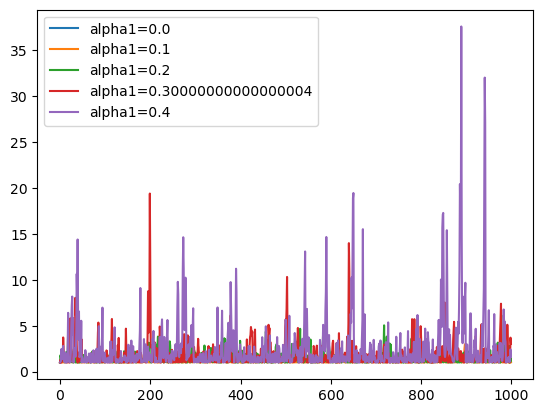

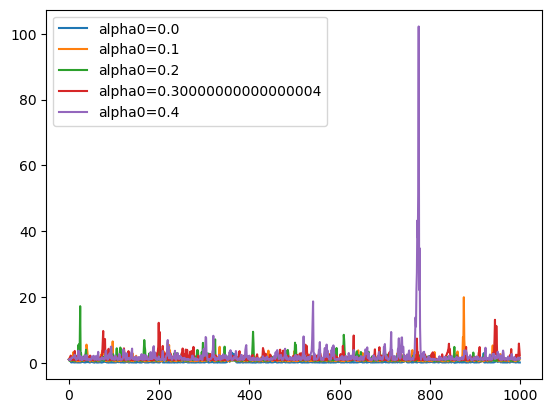

In [67]:
# plot_arch1(1000, 1, 0.1, 1)
# 
# plot_arch1_return(1000, 1, 0.1, 1, 0)
for i in range(5):
    plot_arch1(1000, 1, 0.3*i, 1)
plt.legend([f'alpha1={0.1*i}' for i in range(5)])
plt.show()


# plot_arch1(1000, 1, 0.1, 1)
# 
# plot_arch1_return(1000, 1, 0.1, 1, 0)
for i in range(5):
    plot_arch1(1000, 0.2*i + 1e-2, 1, 1)
plt.legend([f'alpha0={0.1*i}' for i in range(5)])
plt.show()

# GARCH(1, 1) model

$$\sigma_t^2 = \alpha_0 + \alpha_1 a_{t-1}^2 + \beta_1 \sigma_{t-1}^2,$$
    
where $a_t = \sigma_t \epsilon_t$.